In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def showNormImg(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Gambar Asli')    
    
def showHsvImg(hsv_image):
    plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Gambar HSV')
    
def showMaskImg(mask):
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Mask')
    
def showResultImg(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hasil Akhir')


def maskingImg(hsv_image):
    global lower_bound, upper_bound
    # Membuat mask dengan rentang warna putih dalam HSV
    lower_white = np.array(lower_bound)
    upper_white = np.array(upper_bound)
    
    mask = cv2.inRange(hsv_image, lower_white, upper_white)
    return mask

def findAndDrawRect(mask, image, min_area=50, max_area=1000, max_ratio=1.4):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    count = 0 
    
    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)
        ratio = h / w

        if area > min_area and area < max_area:
            ratio = h/w
            if ratio <= max_ratio:
                print(f"num {count} x:{x} y:{y} w:{w} h:{h} area:{area} ratio:{ratio}")
                cv2.rectangle(image,(x,y),(x+w , y+h),(0,255,0),2)
                count += 1
    return image

In [3]:
def process_image(imej):
    # Membaca gambar
    image = cv2.imread(imej)

    # Menampilkan gambar asli
    plt.subplot(1, 4, 1)
    showNormImg(image)

    # Mengubah gambar ke ruang warna HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    plt.subplot(1, 4, 2)
    showHsvImg(hsv_image)

    # Membuat mask dengan rentang warna putih dalam HSV
    mask = maskingImg(hsv_image)
    plt.subplot(1, 4, 3)
    showMaskImg(mask)

    image = findAndDrawRect(mask, image)

    # Menampilkan gambar hasil dengan kotak-kotak pada target
    plt.subplot(1, 4, 4)
    showResultImg(image)

    plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
    plt.show()

In [4]:
def process_images_dict(image_dict):
    num_images = len(image_dict)
    num_rows = num_images  # Setiap gambar di satu baris
    num_cols = 4  # Jumlah kolom (sesuai dengan jumlah langkah proses)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, (key, imej) in enumerate(image_dict.items()):
        row = i  # Setiap gambar di satu baris
        col = 0

        # Membaca gambar
        image = cv2.imread(imej)

        # Menampilkan gambar asli
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Gambar Asli ({key})')

        # Mengubah gambar ke ruang warna HSV
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        col += 1
        axs[row, col].imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Gambar HSV ({key})')

        # Membuat mask dengan rentang warna putih dalam HSV
        lower_white = np.array(lower_bound)
        upper_white = np.array(upper_bound)
        mask = cv2.inRange(hsv_image, lower_white, upper_white)
        col += 1
        axs[row, col].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Mask ({key})')

        # Menemukan kontur dan menggambar kotak pada target
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        count = 0 
        for contour in contours:
            area = cv2.contourArea(contour)
            x, y, w, h = cv2.boundingRect(contour)
            if area > 50 and area < 1000:
                ratio = h / w
                if ratio <= 1.4:
                    print(f"num {count} x:{x} y:{y} w:{w} h:{h} area:{area} ratio:{ratio}")
                    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    count += 1

        # Menampilkan gambar hasil dengan kotak-kotak pada target
        col += 1
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Hasil Akhir ({key})')

    plt.tight_layout()
    plt.show()



In [5]:
lower_bound = [55,  17, 94]
upper_bound = [155, 154, 194]

lower_bound = [0, 0, 200]
upper_bound = [180, 30, 255]
# HSV Value: [116  17 215]
# Lower Bound: [ 66 -33 165]
# Upper Bound: [166  67 265]


num 0 x:10 y:91 w:42 h:16 area:256.5 ratio:0.38095238095238093
num 1 x:20 y:55 w:29 h:32 area:298.5 ratio:1.103448275862069
num 0 x:56 y:86 w:31 h:29 area:284.5 ratio:0.9354838709677419


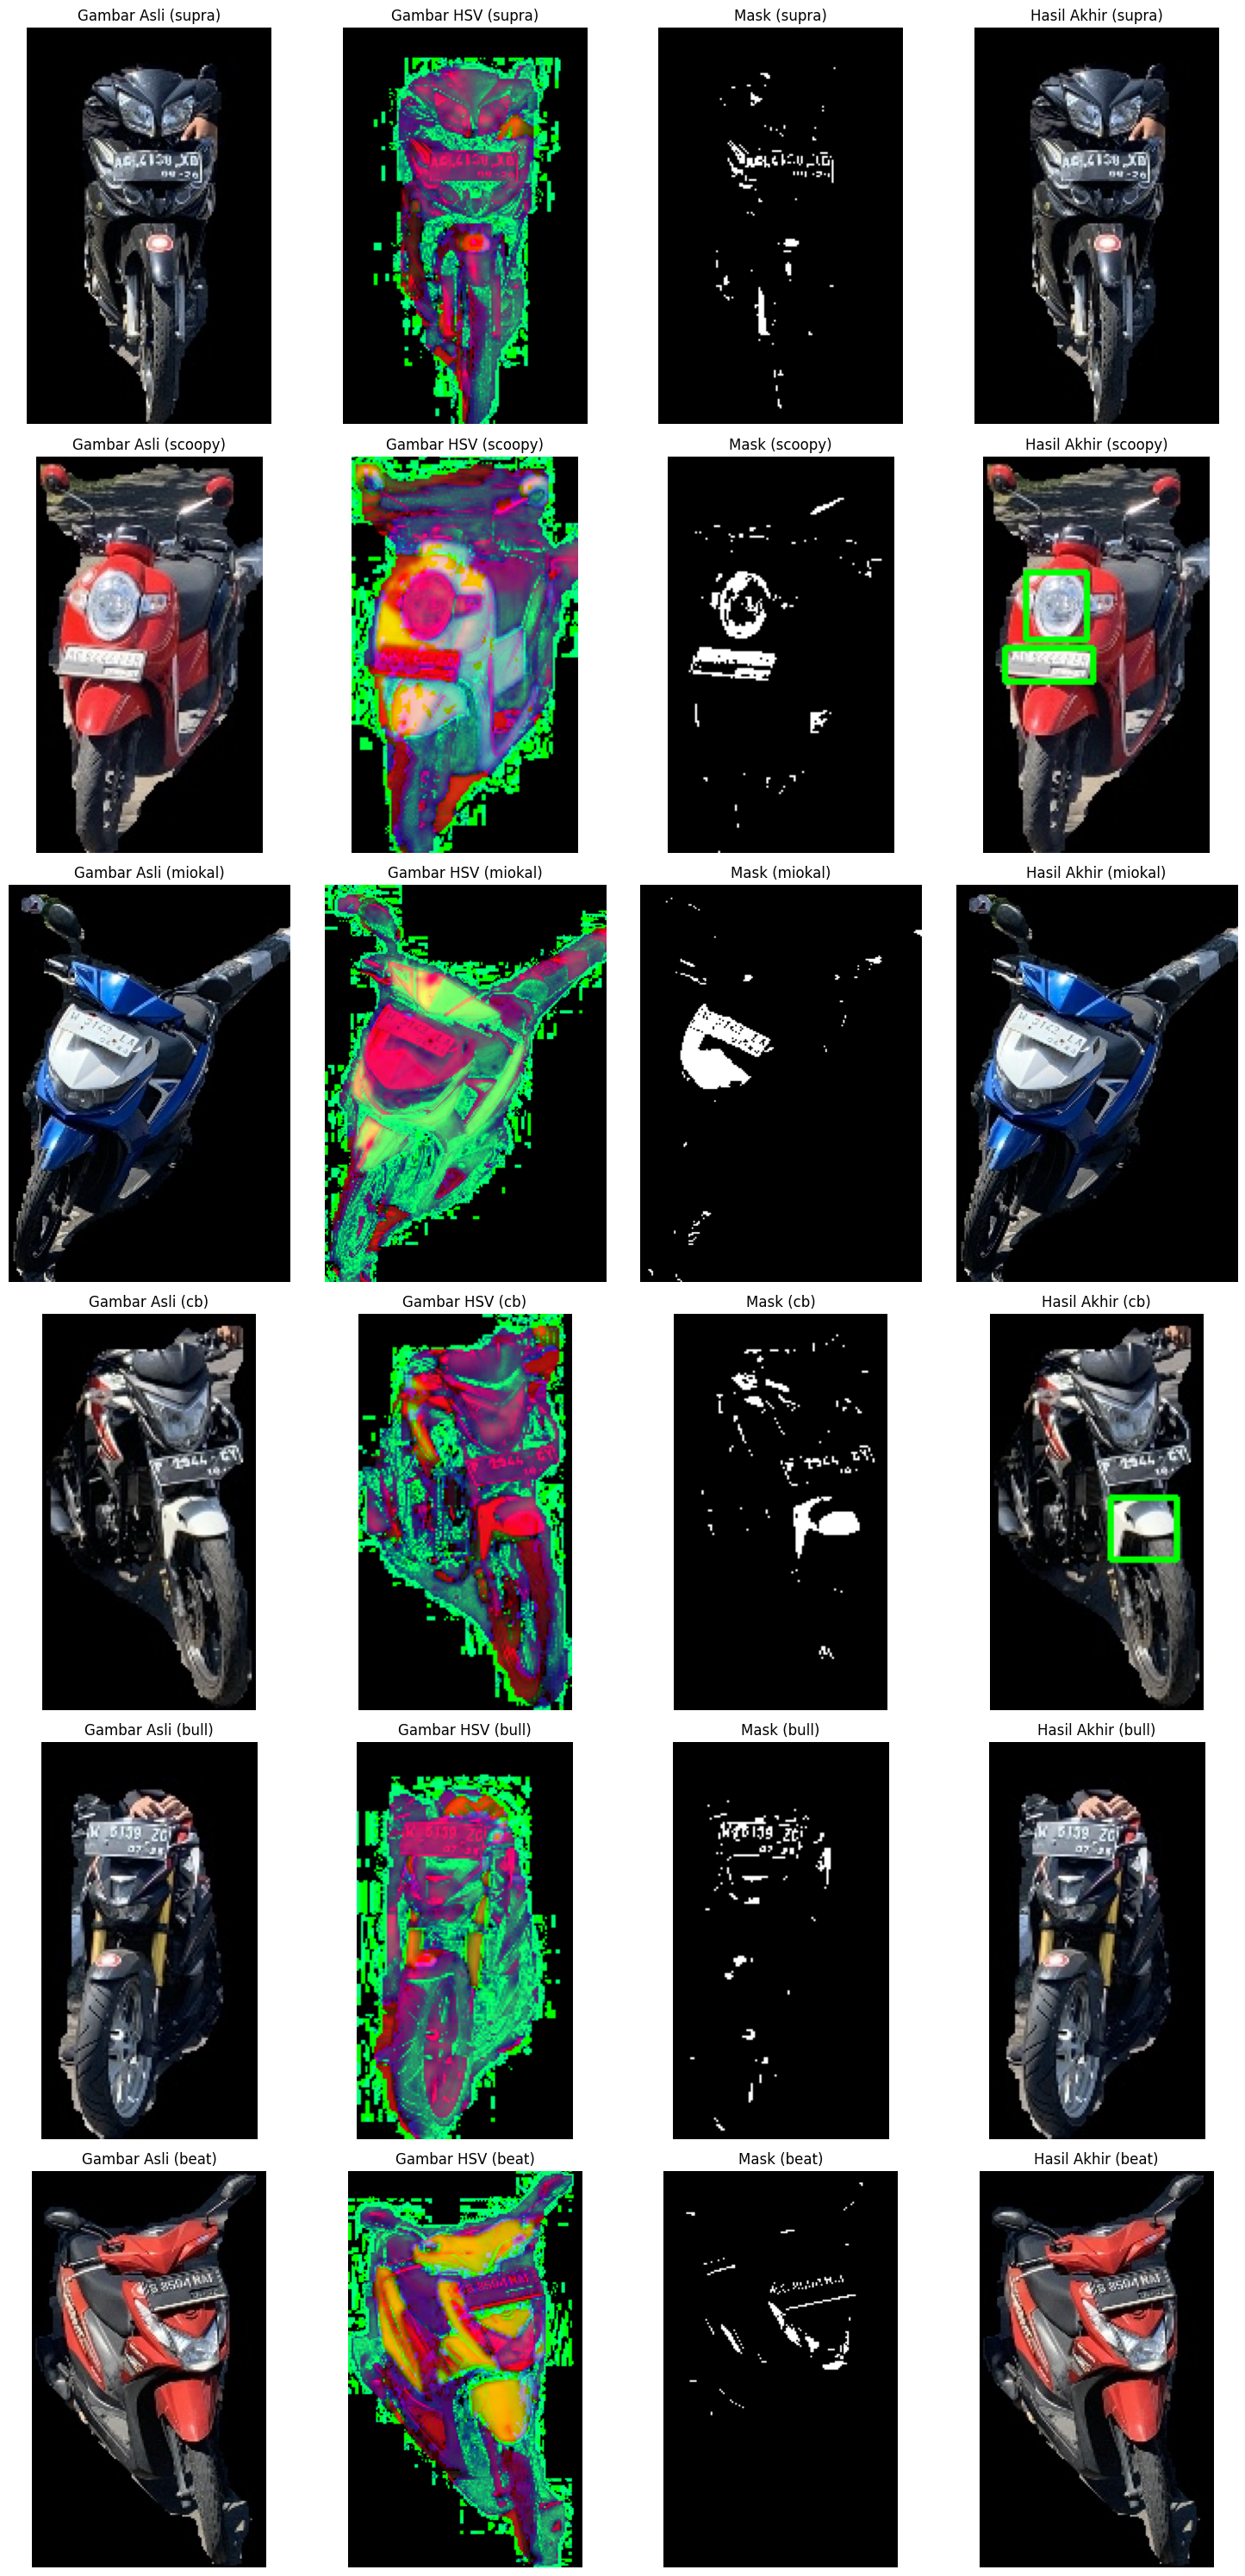

In [6]:
terang_mati = {
    'supra': 'res/terang/mati/430-2.jpg',
    'scoopy': 'res/terang/mati/419-98.jpg',
    'miokal': 'res/terang/mati/319-9.jpg',
    'cb': 'res/terang/mati/270-9.jpg',
    'bull': 'res/terang/mati/248-7.jpg',
    'beat': 'res/terang/mati/221-5.jpg',
}


imej = terang_mati['supra']
imej = terang_mati['scoopy']
imej = terang_mati['miokal']
imej = terang_mati['cb']
imej = terang_mati['bull']
imej = terang_mati['beat']

image = cv2.imread(imej)
# process_image(imej)
process_images_dict(terang_mati)

num 0 x:2 y:92 w:13 h:18 area:60.0 ratio:1.3846153846153846


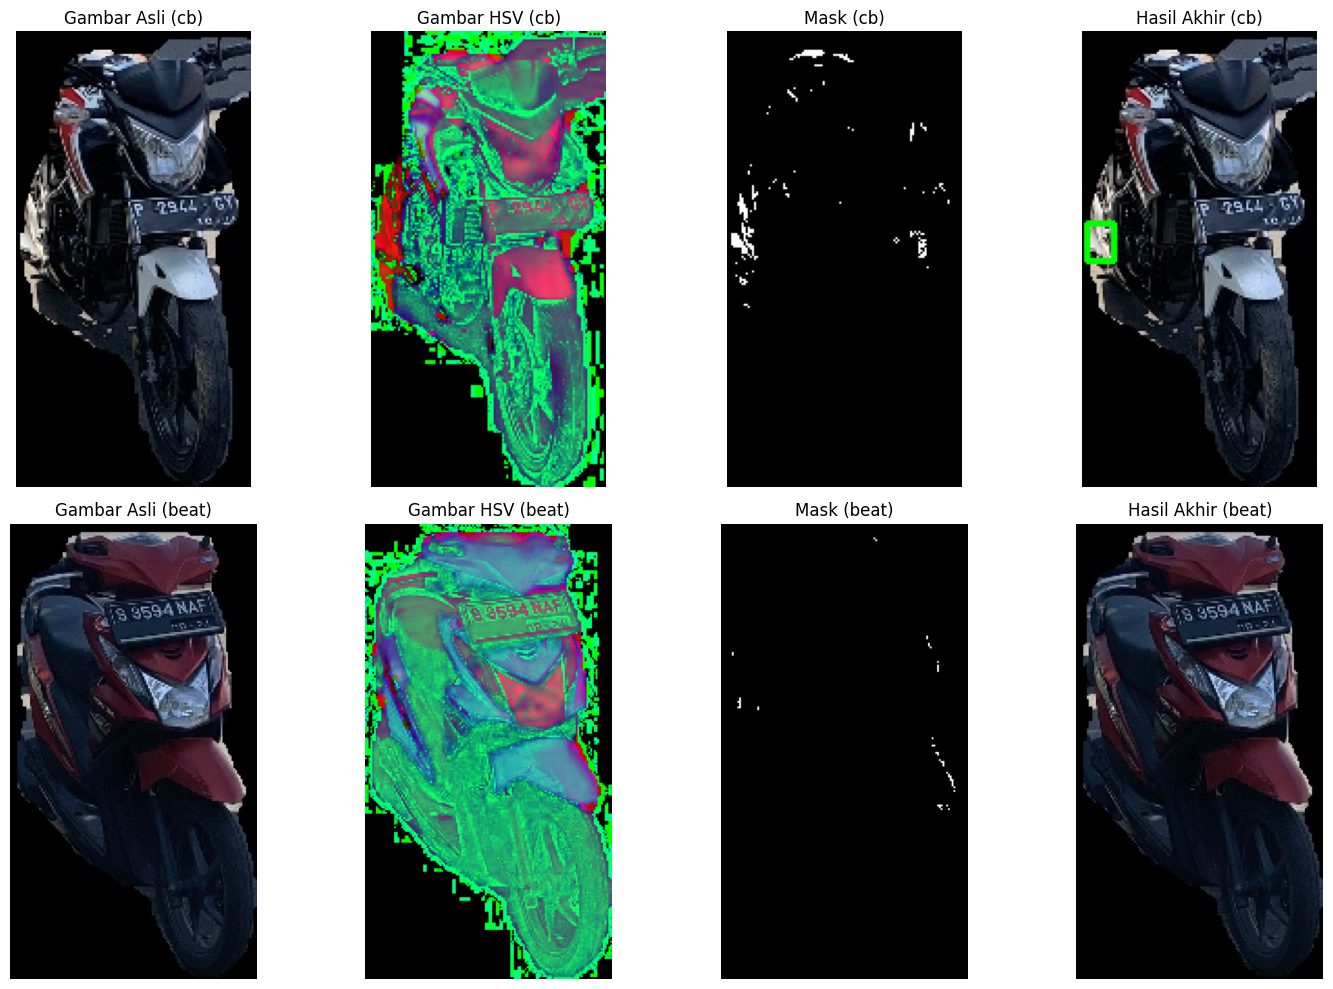

In [7]:
gelap_mati = {
    'cb': 'res/gelap/mati/471-4.jpg',
    'beat': 'res/gelap/mati/440-0.jpg',
}

# imej = gelap_mati['cb']
imej = gelap_mati['beat']
# imej = gelap_mati['scoopy']

image = cv2.imread(imej)
# process_image(imej)
process_images_dict(gelap_mati)